In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
# из модуля sklearn.metrics импортируем
# функцию confusion_matrix()
from sklearn.metrics import confusion_matrix

In [2]:
# записываем CSV-файл в объект DataFrame
data = pd.read_csv('Data/results.csv', sep=';')
data.head(5)

,fact,predict,probability
0,1,1,0.556452
1,1,1,0.556452
2,0,1,0.556452
3,1,1,0.921147
4,1,1,0.921147


In [3]:
# вычисляем матрицу ошибок
confusion = confusion_matrix(data['fact'], data['predict'])
# печатаем матрицу ошибок
print('Матрица ошибок:\n{}'.format(confusion))

Матрица ошибок:
[[464 282]
 [ 73 525]]


In [4]:
# из модуля sklearn.metrics импортируем 
# функцию accuracy_score()
from sklearn.metrics import accuracy_score
# вычисляем правильность
accuracy_score(data['fact'], data['predict'])

0.7358630952380952

In [5]:
# из модуля sklearn.metrics импортируем 
# функцию cohen_kappa_score()
from sklearn.metrics import cohen_kappa_score
# вычисляем каппу Коэна
cohen_kappa_score(data['fact'], data['predict'])

0.48315979669565445

In [6]:
# вычисляем tn, fp, fn, tp
tn, fp, fn, tp = confusion_matrix(
    data['fact'], data['predict']).ravel()
# вычисляем чувствительность
sensitivity = tp / (tp + fn)
# печатаем значение чувствительности
print('Чувствительность: {:.3f}'.format(sensitivity))

Чувствительность: 0.878


In [7]:
# вычисляем специфичность
specificity = tn / (tn + fp)
# печатаем значение специфичности
print('Специфичность: {:.3f}'.format(specificity))

Специфичность: 0.622


In [8]:
# вычисляем 1 - специфичность
one_minus_specificity = fp / (fp + tn)
# печатаем значение 1 - специфичности
print('1 - специфичность: {:.3f}'.format(one_minus_specificity))

1 - специфичность: 0.378


In [9]:
# вычисляем точность
precision = tp / (tp + fp)
# печатаем значение точности
print('Точность: {:.3f}'.format(precision))

Точность: 0.651


In [10]:
# из модуля sklearn.metrics импортируем 
# функцию balanced_accuracy_score()
from sklearn.metrics import balanced_accuracy_score
# вычисляем сбалансированную правильность
balanced_accuracy_score(data['fact'], data['predict'])

0.7499551678068987

In [11]:
# из модуля sklearn.metrics импортируем 
# функцию f1_score()
from sklearn.metrics import f1_score
# вычисляем F1-меру
f1_score(data['fact'], data['predict'])

0.7473309608540926

In [12]:
# задаем порог
mythreshold = 0.3
# получаем прогнозы согласно новому порогу
predictions = (data['probability'] >= mythreshold).astype(int)
# вычисляем матрицу ошибок
confusion = confusion_matrix(data['fact'], predictions)
# печатаем матрицу ошибок
print('Матрица ошибок:\n{}'.format(confusion))

Матрица ошибок:
[[413 333]
 [ 49 549]]


In [13]:
# задаем порог
mythreshold = 0.7
# получаем прогнозы согласно новому порогу
predictions = (data['probability'] >= mythreshold).astype(int)
# вычисляем матрицу ошибок
confusion = confusion_matrix(data['fact'], predictions)
# печатаем матрицу ошибок
print('Матрица ошибок:\n{}'.format(confusion))

Матрица ошибок:
[[729  17]
 [492 106]]


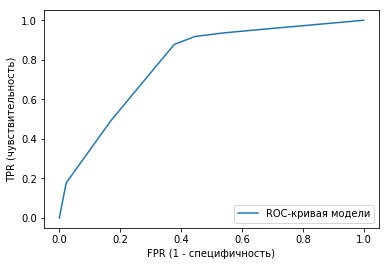

In [14]:
# импортируем библиотеку matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# из модуля sklearn.metrics импортируем функцию roc_curve()
from sklearn.metrics import roc_curve
# вычисляем значения FPR и TPR для всех возможных 
# порогов отсечения, передав функции roc_curve()
# в качестве аргументов фактические значения 
# зависимой переменной и вероятности 
fpr, tpr, thresholds = roc_curve(data['fact'], data['probability'])
# создаем заголовок ROC-кривой
plt.plot(fpr, tpr, label='ROC-кривая модели')
# задаем название для оси x
plt.xlabel('FPR (1 - специфичность)')
# задаем название для оси y
plt.ylabel('TPR (чувствительность)')
# задаем расположение легенды
plt.legend(loc=4)

In [15]:
# импортируем функцию roc_auc_score()
from sklearn.metrics import roc_auc_score
# вычисляем значение AUC-ROC, передав функции 
# roc_auc_score() в качестве аргументов фактические 
# значения зависимой переменной и вероятности 
auc = roc_auc_score(data['fact'], data['probability'])
# печатаем AUC-ROC
auc

0.7874797134326217

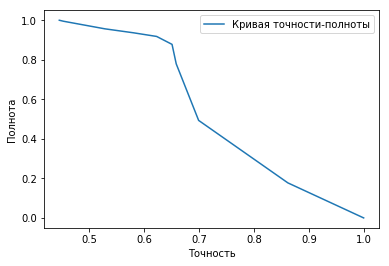

In [16]:
# из модуля sklearn.metrics импортируем функцию precision_recall_curve()
from sklearn.metrics import precision_recall_curve
# вычисляем значения FPR и TPR для всех возможных порогов отсечения, 
# передав функции precision_recall_curve() в качестве аргументов 
# фактические значения зависимой переменной и вероятности
precision, recall, thresholds = precision_recall_curve(
    data['fact'], data['probability'])
plt.plot(precision, recall, label='Кривая точности-полноты')
plt.xlabel('Точность')
plt.ylabel('Полнота')
plt.legend(loc='best')

In [18]:
# импортируем функцию average_precision_score()
from sklearn.metrics import average_precision_score
# вычисляем значение AUC-PR, передав функции 
# average_precision_score() в качестве аргументов 
# фактические значения зависимой переменной и вероятности
aucpr = average_precision_score(
    data['fact'], data['probability'])
# печатаем AUC-PR
aucpr

0.6919832851759973

In [19]:
# импортируем функцию log_loss()
from sklearn.metrics import log_loss
# вычисляем logloss
logloss = log_loss(data['fact'], data['probability'])
# печатаем logloss
logloss

0.5316743367992773